## ML Assignment 4
------

Design a housing price predictor taking only the following features.
- Floor area (plot size)
- Number of bedrooms
- Number of bathrooms 

Takeing 70% for designing the predictor and 30% for validating the design

#### (a) [Using Normal Equation](#Question-1) 
#### (b) [Gradiend Descent (Feature Scaling)](#Question-2)
#### (c) [Gradiend Descent (Regularization)](#Question-3)
#### (d) [LWR](#Question-4)

### 1) Importing the required files.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### 2) Reading the csv data and sectioning what is necessary 

In [2]:
hp = pd.read_csv('Housing_Price_data_set.csv')
hp1 = hp[['lotsize', 'bedrooms', 'bathrms', 'price']]
hp1.head()

,lotsize,bedrooms,bathrms,price
0,5850,3,1,42000.0
1,4000,2,1,38500.0
2,3060,3,1,49500.0
3,6650,3,1,60500.0
4,6360,2,1,61000.0


### 4) Training and Validation Set (70 : 30)

In [3]:
hp_train = hp1.iloc[:383]
hp_val = hp1.iloc[383:]

### 5) Visualize the data

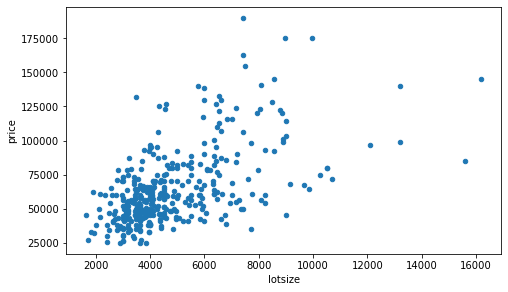

In [4]:
figure, ax = plt.subplots(1, figsize=(7,4))
hp_train.plot(kind='scatter',x='lotsize',y='price',ax=ax)

figure.tight_layout(pad=0.5)

## Question 1
a) Normal equations  with  and without regularization and compare their performances in terms of % error in prediction.

## Initializing the matrices for Normal equation

In [25]:
m = hp_train.shape[0]
X = np.concatenate((np.ones((m, 1)), np.array(hp_train.iloc[:, 0:3])), axis=1)
Y = np.array(hp_train.iloc[:, 3])

m_val = hp_val.shape[0]
X_val = np.concatenate((np.ones((m_val, 1)), np.array(hp_val.iloc[:, 0:3])), axis=1)
Y_val = np.array(hp_val.iloc[:, 3])

print(X.shape, Y.shape)
print(X_val.shape, Y_val.shape)

(383, 4) (383,)
(163, 4) (163,)


## Feature scaling

In [6]:
muX = np.mean(X[:,1])
sigmaX = (np.mean((X[:,1] - muX)**2))**(1/2)

X[:,1] = (X[:,1] - muX) / sigmaX
X_val[:,1] = (X_val[:,1] - muX) / sigmaX

------

## Calculating the Weights using Normal Equation (no Regularization)

In [7]:
inverse = np.linalg.inv(np.dot(X.T, X))

W = np.dot(inverse, np.dot(X.T, Y))         # Normal EQ.

print(W.shape)
print(W)

(4,)
[23950.22814569 12626.39105235  5514.6731898  18764.23913149]


## Mean Average Percentage Error - MAPE 

In [8]:
Y_predicted = np.dot(X_val, W)

J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 3)
print("Percent error =", percentage)

Percent error = 18.742


------

## Calculating the Weights using Normal Equation (with Regularization)

In [9]:
E = np.eye(4)
E[0, 0] = 0                     # regularization term
lambda_ = 10
inverse = np.linalg.inv(np.dot(X.T, X) + lambda_*E)     # regularized 

W = np.dot(inverse, np.dot(X.T, Y))                     # Normal EQ + regularzation.

print(W.shape)
print(W)

(4,)
[25542.6129996  12487.53792415  5714.30988413 17056.93043301]


## Mean Average Percentage Error - MAPE 

In [10]:
Y_predicted = np.dot(X_val, W)
J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 3)
print("Percent error =", percentage)

Percent error = 18.55


------

## Attempting a Complex Hypothesis function.

H(x) = w0 + w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> + w<sub>4</sub>x<sub>1</sub>x<sub>2</sub> + w<sub>5</sub>x<sub>2</sub>x<sub>3</sub> + w<sub>6</sub>x<sub>3</sub>x<sub>1</sub>

In [11]:
X_ = np.column_stack((X[:,1]*X[:,2], X[:,2]*X[:,3], X[:,3]*X[:,1]))

X = np.concatenate((X, X_), axis = 1)

------

## Calculating the Weights using Normal Equation (no Regularization)

In [12]:
inverse = np.linalg.inv(np.dot(X.T, X))

W = np.dot(inverse, np.dot(X.T, Y))         # Normal EQ.

print(W.shape)
print(W)

(7,)
[-6402.01907888 10619.92270948 15152.38452492 44096.01385518
 -1377.20959651 -7874.93288848  4767.03008395]


In [13]:
X_ = np.column_stack((X_val[:,1]*X_val[:,2], X_val[:,2]*X_val[:,3], X_val[:,3]*X_val[:,1]))

X_val = np.concatenate((X_val, X_), axis = 1)

## Mean Average Percentage Error - MAPE 

In [14]:
Y_predicted = np.dot(X_val, W)

J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 3)
print("Percent error =", percentage)

Percent error = 18.237


------

## Calculating the Weights using Normal Equation (with Regularization)

In [15]:
E = np.eye(7)
E[0, 0] = 0                     # regularization term
lambda_ = 10
inverse = np.linalg.inv(np.dot(X.T, X) + lambda_*E)     # regularized 

W = np.dot(inverse, np.dot(X.T, Y))                     # Normal EQ + regularzation.

print(W.shape)
print(W)

(7,)
[30905.88587402 10063.74839581  4195.37048647 13051.87936238
  -620.46664021  1004.50406377  3035.5280464 ]


## Mean Average Percentage Error - MAPE 


In [16]:
Y_predicted = np.dot(X_val, W)
J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 3)
print("Percent error =", percentage)

Percent error = 18.134


------

## Question 2

b) Design Predictor using 

- [Batch Gradient Descent Algorithm](#Batch-Gradient-Descent-Algorithm)
- [Stochastic Gradient Algorithm](#Stocastic-Gradient-Descent-Algorithm)
- [Mini Batch Gradient Descent Algorithms (minibatch size is your choice (10, 20, 30 etc.))](#Mini-Batch-Gradient-Descent-Algorithm)

with and without **feature scaling** and compare their performances in terms of % error in prediction

------

### NOTE : before moving on to Q2 run [Initialization cell](#Initializing-the-matrices-for-Normal-equation)

### Feature Normalization

In [18]:
def featureNormal(X):
    
    X_norm = np.copy(X)
    
    mu = np.mean(X[:,1])
    sigma = np.std(X[:,1])
        
    X_norm[:,1] = (X[:,1] - mu) / sigma
    
    return X_norm, mu, sigma

### Calculate the Cost 

In [19]:
def calcCost(X, Y, W):
    
    m = X.shape[0]
    
    J = (0.5*m) * np.sum(np.square(np.dot(X, W) - Y))
    
    return J

### Batch Gradient Descent Algorithm

In [20]:
def batchGradDescent(X, Y, W, alpha, epochs):
    
    m = Y.shape[0]
    
    J_history = []
    
    for i in range(epochs):
        W = W - (alpha/m)*(np.dot(X.T, (np.dot(X, W) - Y)))
        
        J_history.append(calcCost(X, Y, W))
    
    return W, J_history

### Stocastic Gradient Descent Algorithm

In [21]:
def stocasticGradDescent(X, Y, W, alpha, epochs):
    
    m = Y.shape[0]
    
    J_history = []
    
    for i in range(epochs):
        for j in range(m):
            W = W - (alpha)*(np.dot(X[j].T, (np.dot(X[j], W) - Y[j])))
        
            J_history.append(calcCost(X, Y, W))
    
    return W, J_history

### Mini Batch Gradient Descent Algorithm

In [22]:
def miniBatchGradDescent(X, Y, W, alpha, epochs, batch_size):
    
    m = Y.shape[0]
    batches = m // batch_size
    
    J_history = []
    
    for i in range(epochs):
        for j in range(batches):
            W = W - (alpha/batch_size)*(np.dot(X[j*batch_size:(j+1)*batch_size].T, (np.dot(X[j*batch_size:(j+1)*batch_size], W) - Y[j*batch_size:(j+1)*batch_size])))
        
            J_history.append(calcCost(X, Y, W))
        
        # remaining rows
        W = W - (alpha/(m-(batches*batch_size)))*(np.dot(X[batches*batch_size:].T, (np.dot(X[batches*batch_size:], W) - Y[batches*batch_size:])))
        
        J_history.append(calcCost(X, Y, W))
    
    return W, J_history

### Analysis of BGD, SGD, MBGD ( Without Feature scaling )

Percent error of BGD = 29.978
Percent error  of SGD = 29.96
Percent error  of MBGD = 29.96


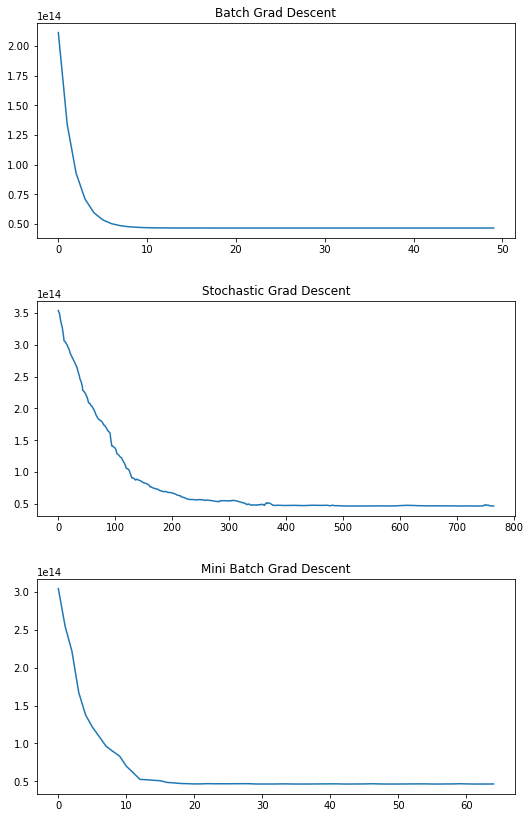

In [23]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

alpha = 0.00000001
W = np.zeros(4)
epochs = 50

W, J_history = batchGradDescent(X, Y, W, alpha, epochs)

axs[0].plot(range(epochs), J_history)
axs[0].set_title('Batch Grad Descent')


Y_predicted = np.dot(X_val, W)
J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 3)
print("Percent error of BGD =", percentage)

# --------------------

alpha = 0.0000000003
W = np.zeros(4)
epochs = 2

W, J_history = stocasticGradDescent(X, Y, W, alpha, epochs)

axs[1].plot(range(epochs*m), J_history)
axs[1].set_title('Stochastic Grad Descent')


Y_predicted = np.dot(X_val, W)
J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 3)
print("Percent error  of SGD =", percentage)

# ---------------------

alpha = 0.000000005
W = np.zeros(4)
epochs = 5
batch_size = 30

W, J_history = miniBatchGradDescent(X, Y, W, alpha, epochs, batch_size)


axs[2].plot(range(epochs*(math.ceil(m/batch_size))), J_history)
axs[2].set_title('Mini Batch Grad Descent')

Y_predicted = np.dot(X_val, W)
J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 3)
print("Percent error  of MBGD =", percentage)

# ----------------------

fig.tight_layout(pad=3.0)

### Analysis of BGD, SGD, MBGD ( With Feature scaling )

Percent error of BGD = 18.606
Percent error  of SGD = 18.508
Percent error  of MBGD = 17.898


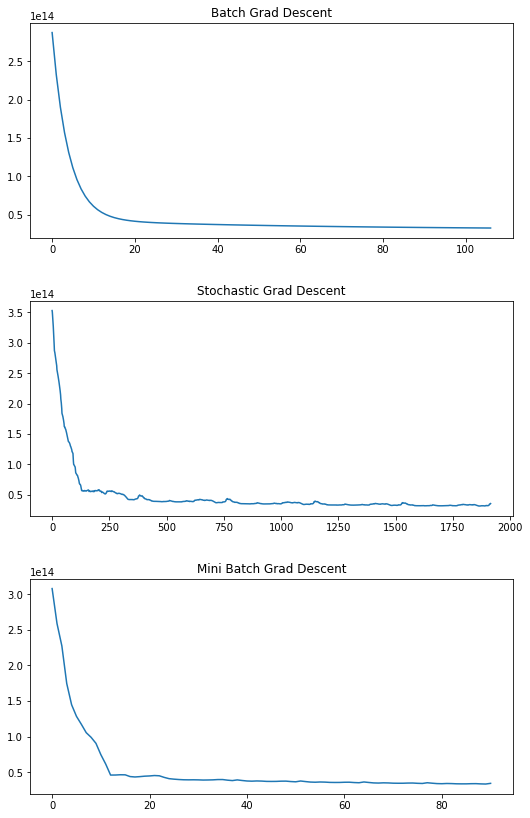

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

X_val_norm = np.copy(X_val)
X_val_norm[:,1] = (X_val[:,1] - muX) / sigmaX

alpha = 0.01
W = np.zeros(4)
epochs = 107

X_norm, muX, sigmaX = featureNormal(X)

W, J_history = batchGradDescent(X_norm, Y, W, alpha, epochs)

axs[0].plot(range(epochs), J_history)
axs[0].set_title('Batch Grad Descent')


Y_predicted = np.dot(X_val_norm, W)
J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 3)
print("Percent error of BGD =", percentage)

# --------------------

alpha = 0.001
W = np.zeros(4)
epochs = 5

W, J_history = stocasticGradDescent(X_norm, Y, W, alpha, epochs)

axs[1].plot(range(epochs*m), J_history)
axs[1].set_title('Stochastic Grad Descent')


Y_predicted = np.dot(X_val_norm, W)
J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 3)
print("Percent error  of SGD =", percentage)

# ---------------------

alpha = 0.01
W = np.zeros(4)
epochs = 7
batch_size = 30

W, J_history = miniBatchGradDescent(X_norm, Y, W, alpha, epochs, batch_size)


axs[2].plot(range(epochs*(math.ceil(m/batch_size))), J_history)
axs[2].set_title('Mini Batch Grad Descent')

Y_predicted = np.dot(X_val_norm, W)
J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 3)
print("Percent error  of MBGD =", percentage)

# ----------------------

fig.tight_layout(pad=3.0)

------

## Question 3

c) Same as [Question 2](#Question-2) with and without **regularization**.<br/>
Compare their performances in terms of % error in prediction.

------

### NOTE : Before moving on to Q3 run [Initialization cell](#Initializing-the-matrices-for-Normal-equation)

### Calculate regularized cost

In [26]:
def calcCostReg(X, Y, W, lambda_):
    
    m = X.shape[0]
    
    J = (0.5*m) * (np.sum(np.square(np.dot(X, W) - Y)) + lambda_*np.sum(np.square(W)))
    
    return J

### Batch Gradient Descent Using Regularization

In [27]:
def batchGradDescentReg(X, Y, W, alpha, lambda_, epochs):
    
    m = Y.shape[0]
    
    J_history = []
    
    for i in range(epochs):
        W[0] = W[0] - (alpha/m)*(np.dot(X.T[0], (np.dot(X, W) - Y)))
        W[1:] = W[1:] - (alpha/m)*(np.dot(X.T[1:], (np.dot(X, W) - Y)) - lambda_*(W[1:]))
        
        J_history.append(calcCostReg(X, Y, W, lambda_))
    
    return W, J_history

### Stocastic Gradient Descent Using Regularization

In [28]:
def stocasticGradDescentReg(X, Y, W, alpha, lambda_, epochs):
    
    m = Y.shape[0]
    
    J_history = []
    
    for i in range(epochs):
        for j in range(m):
            W[0] = W[0] - (alpha)*(np.dot(X[j].T[0], (np.dot(X[j], W) - Y[j])))
            W[1:] = W[1:] - (alpha)*(np.dot(X[j].T[1:], (np.dot(X[j], W) - Y[j])) - lambda_*(W[1:]))
        
            J_history.append(calcCostReg(X, Y, W, lambda_))
    
    return W, J_history

### Mini Batch Gradient Descent Using Regularization

In [29]:
def miniBatchGradDescentReg(X, Y, W, alpha, lambda_, epochs, batch_size):
    
    m = Y.shape[0]
    batches = m // batch_size
    
    J_history = []
    
    for i in range(epochs):
        for j in range(batches):
            W[0] = W[0] - (alpha/batch_size)*(np.dot(X[j*batch_size:(j+1)*batch_size].T[0], (np.dot(X[j*batch_size:(j+1)*batch_size], W) - Y[j*batch_size:(j+1)*batch_size])))
            
            W[1:] = W[1:] - (alpha/batch_size)*(np.dot(X[j*batch_size:(j+1)*batch_size].T[1:], (np.dot(X[j*batch_size:(j+1)*batch_size], W) - Y[j*batch_size:(j+1)*batch_size])) - lambda_*(W[1:]))
        
            J_history.append(calcCostReg(X, Y, W, lambda_))
        
        # remaining rows
        W[0] = W[0] - (alpha/(m-(batches*batch_size)))*(np.dot(X[batches*batch_size:].T[0], (np.dot(X[batches*batch_size:], W) - Y[batches*batch_size:])))
        
        W[1:] = W[1:] - (alpha/(m-(batches*batch_size)))*(np.dot(X[batches*batch_size:].T[1:], (np.dot(X[batches*batch_size:], W) - Y[batches*batch_size:])) - lambda_*(W[1:]))
        
        J_history.append(calcCostReg(X, Y, W, lambda_))
    
    return W, J_history

### Analysis of BGD, SGD, MBGD ( With Feature scaling and Regularization )

Percent error of BGD with Regularization = 18.605
Percent error  of SGD with Regularization = 18.5063
Percent error  of MBGD with Regularization = 17.874


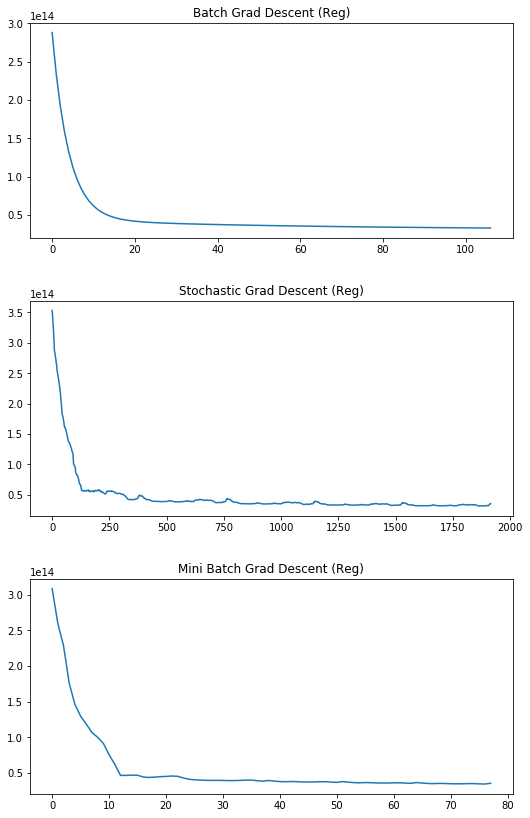

In [30]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

X_val_norm = np.copy(X_val)
X_val_norm[:,1] = (X_val[:,1] - muX) / sigmaX

alpha = 0.01
lambda_ = 0.01
W = np.zeros(4)
epochs = 107

X_norm, muX, sigmaX = featureNormal(X)

W, J_history = batchGradDescentReg(X_norm, Y, W, alpha, lambda_, epochs)

axs[0].plot(range(epochs), J_history)
axs[0].set_title('Batch Grad Descent (Reg)')


Y_predicted = np.dot(X_val_norm, W)
J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 4)
print("Percent error of BGD with Regularization =", percentage)

# ----------------------------------------------

alpha = 0.001
lambda_ = 0.0001
W = np.zeros(4)
epochs = 5

W, J_history = stocasticGradDescentReg(X_norm, Y, W, alpha, lambda_, epochs)

axs[1].plot(range(epochs*m), J_history)
axs[1].set_title('Stochastic Grad Descent (Reg)')


Y_predicted = np.dot(X_val_norm, W)
J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 4)
print("Percent error  of SGD with Regularization =", percentage)

# ----------------------------------------------

alpha = 0.01
lambda_ = 0.01
W = np.zeros(4)
epochs = 6
batch_size = 30

W, J_history = miniBatchGradDescentReg(X_norm, Y, W, alpha, lambda_, epochs, batch_size)


axs[2].plot(range(epochs*(math.ceil(m/batch_size))), J_history)
axs[2].set_title('Mini Batch Grad Descent (Reg)')

Y_predicted = np.dot(X_val_norm, W)
J = np.sum(np.abs((Y_predicted - Y_val)/Y_val))

percentage = round((J/m_val) * 100, 3)
print("Percent error  of MBGD with Regularization =", percentage)

# ----------------------------------------------

fig.tight_layout(pad=3.0)

------

## Question 4

d) Implement the LWR algorithm on the Housing Price data set with different tau values.<br/>
Find out the tau value which will provide the best fit predictor and hence compare its
results with (a) , (b) and (c) above.

------

In [31]:
# WIP